In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap

In [3]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.
    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
        
    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
    """
    
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """ Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors,
            where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.
        Returns
        -------
        self : object
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


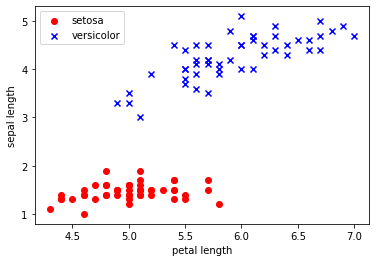

In [5]:
y = df.iloc[:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

X = df.iloc[0:100, [0, 2]].values

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

In [6]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

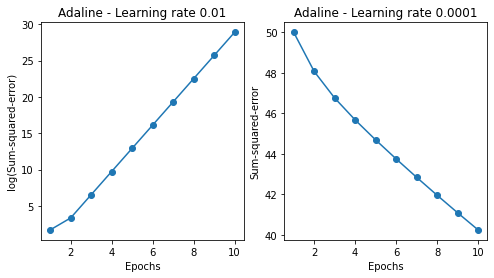

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_yldata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAe4AAAEWCAYAAACg1nQiAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8vihELAAAACXBIWXMAAAsTAAALEwEAmpwYAABGOklEQVR4nO3dd3hUZdrH8e+dHiAQkNBCrxZaICBlxS52EWzYKCLYVmyo7Lu76q6urqyu4tqlKdhF7ALL2kUgEDpSlCKhl0CAhLT7/eOcYAgpk5DJmcncn+uaKzNn5sz8Jskz95xznvM8oqoYY4wxJjiEeR3AGGOMMb6zwm2MMcYEESvcxhhjTBCxwm2MMcYEESvcxhhjTBCxwm2MMcYEESvcpRCRySLyqI+P/VpERrjXrxORWf5NF7hE5DQRWe11DhNarL1WjLXX4BOShdtttHtFJNofz6+q01T1PH88d1lEZIOInOPFaxdQ1e9UtYOXGQqIyBkisvk4n+NsEflZRA6JyFci0qKUx9YTkQ9F5KCIbBSRawvdFyUi77t/IxWRM44nV6iw9upf1l6Lb69lPZc4/ikiu93LkyIihe7/u4gsE5FcEXn4eN5TUSFXuEWkJXAaoMCl3qYJTiIS7nUGONJw/Po/LCL1genAX4B6QArwTimrPA9kAw2B64AXReSUQvd/D1wPbPNL4GrG2uvxs/Zasfbqw3ONBAYAXYDOwMXAqEL3rwPuBz47zrd1LFUNqQvwV+AH4Gng0yL3JQGLgAz3D/Q28Kh7X13gU2AnsNe93rTQul8DI9zrQ4HvC92nwC3AWnfd5wEpdP9wYJV730ygxXG8vw3AOcUsDwMeBH4BdgPvAvUK3f8eTjHZB3wLnFLovsnAi8DnwEHgHPd17gOWuuu8A8S4jz8D2FwkU7GPde+/H9gKbAFGuL+vtiW8v6+Bx9y/YSbQFhjm/v4ygF+BUe5ja7qPyQcOuJcmZf0uirzeSODHQrcLnvPEYh5bE+dDoH2hZW8ATxTz2M3AGV63h0C/YO3V2qtH7bWs5wJ+BEYWuv8m4KdiXmcq8HBltouQ2+IGbgSmuZf+ItIQnN2YwAycP1w9nIYxqNB6YcAkoAXQHOcP+J9yvO7FQA+cb2dXAf3d1x0A/AkYCCQA3wFvVeSNleFOnG+Hp+M0hoIPpAJfAO2ABjgfhtOKrH8tTgOMw9lqBOd9nA+0wvnGObSU1y/2sSJyPnAPzodLWzdfWW7AaVRxwEZgB87vtzbOh8K/RaSbqh4ELgC2qGot97LFh99FYacASwpuuM/5i7u8qPZAnqquKbRsSQmPNb6x9mrt1av2WtZzHXU/VdjWQ6pwi8gfcBryu6q6EOePUHBMoxcQCTyjqjmq+j6woGBdVd2tqh+o6iFVzcBpFL780xZ4QlXTVXUT8BXQ1V0+CnhcVVepai7wD6BracdlKmgU8H+qullVDwMPA1eISASAqk5U1YxC93URkTqF1v9IVX9Q1XxVzXKXjVfVLaq6B/ik0HsqTkmPvQqYpKorVPUQ8IgP72Wy+/hc92/1mar+oo5vgFk4u1cr9LsoohbOVkdh+3A+hI7nsaYM1l6tvfryuyiiMttree/fB9QqfJzbX0KqcANDgFmqusu9/aa7DJxvcmnq7ttwbSy4IiI1RORltwPDfpzdU/HlOH5U+JjmIZw/OjgfTM+KSLqIpAN7AAESiz6BiLwkIgfcy598fN0CLYAPC73OKiAPaCgi4SLyhIj84r63De469Qut/1s53lNxSnpskyLPXdzrFHXUY0TkAhH5SUT2uO/tQo7OXlSJv4tiHnsAZ8ugsNo4u/mO57GmbNZerb2Cd+21vPfXBg4U+Z/0i+K+sVRLIhKL820xXEQK/imjcRpzF5xjNokiIoV+8c1xvuUD3At0AE5V1W0i0hVIxWm0x+M34DFVLbqr6xiqegvOsbeKvs5wVf2h6B0icgNwGb8fC6uDszuq8Hvz1z/jVqBpodvNfFjnSBZxehp/gLNL9SNVzRGRGfyevbjcJf4uirGC34sFIlITaOMuL2oNECEi7VR1rbusSwmPNaWw9mrttRCv2mtZz7XCffz8Ytb1q1Da4h6A8y3tZJzdPl2Bk3COUd0IzAVygTtFJEJEBgI9C60fh3OcLF1E6gEPVVKul4CxhXoy1hGRK4/zOSNFJKbQJcJ9nccKdumJSIKIXOY+Pg44jNPxowbO7r+q8i4wTEROEpEaOJ2RyiMK5wN9J5ArIhcAhU/t2Q6cUGQ3Ymm/i6I+BDqKyCARiXHzLVXVn4s+0D0GNh34m4jUFJG+OB+wbxQ8RkSi3ecBiHL/Pn7ftRaEBmDt1dqrw6v2WtZzvQ7cIyKJItIE58vi5ILnF5FId70wnC8IMeXY41OqUCrcQ3COzWxS1W0FF5wOK9fh9GQciNMJYy9wNc4ftcAzQCywC/gJ+LIyQqnqh8A/gbfd3V7LcTpoHI/PcT60Ci4PA88CHwOzRCQD5z2c6j7+dZzdjGnASve+KqGqXwDjcY4jrsP5QAbng8mX9TNwOq+8i/N3uxbnfRbc/zNO56Ff3V1tTSj9d1H0+XfidHp6zH3+U4FrCu4XkT+JyBeFVrkN5/9kh/u6t6pq4W/hq3H+Jok4PZIzcXYFmqNZe7X26ml7Leu5gJdxjv8vw/k/+MxdVuBVnL/nYOD/3Os3+PBrKpNUwe54Y3wmIifhNIJot/OPMSZAWXv1RihtcZsAJSKXizOqWF2crZlP7EPAmMBk7dV7VrhNIBiFc8zrF5zjmrd6G8cYUwprrx6zXeXGGGNMEPHbFrfbg26+iCwRkRUi8oi7vJ6IzBaRte7Puv7KYIwxxlQ3ftvidk9xqamqB0QkEmfYvdE4PUH3qOoTIvIgUFdVHyjtuerXr68tW7b0S05jqpOFCxfuUtUEr3OUxNqyMb4prS37bQAWd1CEA+7NSPeiOOfJneEun4IzCH2phbtly5akpKT4Jacx1YmIbCz7Ud6xtmyMb0pry/6eYi1cRBbjnCM3W1XnAQ1VdSuA+7NBCeuOFJEUEUnZuXOnP2MaY4wxQcOvhVtV81S1K84QeT1FpGM51n1FVZNVNTkhIWD3/BljjDFVqkpOB1PVdJxd4ucD20WkMYD7c0dVZDDGGGOqA3/2Kk8QkXj3eizOgPg/4wxdVzBw+xDgI39lMMYYY6obf84O1hiY4g6qHoYzp+6nIjIXeFdEbgI2Acc7QL8xxhgTMvzZq3wpkFTM8t3A2f56XWOqmxmpaYybuZot6Zk0iY9lTP8ODEg6ZvpnvxORDThzEecBuaqa7M689Q7QEmeKyatUdW9FXyNQ3qsxgcyGPDUmgM1ITWPs9GWkpWeiQFp6JmOnL2NGappXkc5U1a6qmuzefhCYo6rtgDnu7QoJwPdqTECywm1MABs3czWZOXlHLcvMyWPczNUeJTrGZTjjMeD+HFDRJwqC92pMQLDCbUwA25KeWa7lfqY4cyIvFJGR7rIyx2XwdUyGAHuvxgQsK9zGBLC4mOK7oTSJj63iJAD0VdVuwAXA7SLSz5eVfB2ToaT35NF7NSZgWeE2JkB9sHAz+7NyCRc5anlsZDhj+neo8jyqusX9uQP4EOhJJY7LMKZ/B2Ijw49a5tV7NSaQWeE2JgB9t3YnD3ywlD5tTuCfgzqRGB+LAInxsTw+sFOV97QWkZoiEldwHTgPWE4ljsswICmRxwc677XAqNNbW69yY4rw53ncxpgKWLllP7dOXUTbBrV46Ybu1I6J5IrkZl7Hagh86Ez6RwTwpqp+KSILqMRxGQYkJTIgKZGDh3Pp9+RXzF+/57iDG1PdWOE2JoCkpWcybPJ8akVHMGlYD2rHRHodCQBV/RXoUsxyv4zLUDM6gtvPbMvfPl3JD+t20bdt/cp+CWOClu0qNyZA7DuUw9CJ8zl0OI/Jw3vQuE5od8q69tTmNKkTw5MzV+PMEmyMASvcxgSEw7l5jHwjhQ27D/Lyjd05sVFtryN5LiYynNHntGPJb+nMXrnd6zjGBAwr3MZ4LD9fuffdJcxbv4d/XdmFPm1st3CBQd2a0qp+TZ6atYa8fNvqNgascBvjuSe+/JlPl27lwQtO5LKu1oO6sIjwMO45tz2rt2fwyZItXscxJiBY4TbGQ5N+WM8r3/7Kjb1bMKpfa6/jBKSLOjXmpMa1eXr2GnLy8r2OY4znrHAb45Evl2/lb5+u5NyTG/LQJacgRQZaMY6wMGFM//Zs2nOId1N+8zqOMZ6zwm2MB1I27GH024vp2iye8dckER5mRbs0Z3ZoQPcWdRk/Zy1ZRSYiMSbUWOE2por9svMAI15PoUl8LBOG9CA2KrzslUKciDCmfwe27z/MG3M3eh3HGE9Z4TamCu3IyGLIxPmEizB5WA/q1YzyOlLQ6NX6BE5rV58Xvl5HRlaO13GM8YwVbmOqyMHDudw0OYXdB7KZOLQHLU6o6XWkoDOmfwf2HsphwvfrvY5ijGescBtTBXLz8rn9zUWs2LKP/1ybRJdm8V5HCkqdm8Zz/imNeO279ew5mO11HGM8YYXbGD9TVf48Yzlfr97J3wd05OyTGnodKajde157Dmbn8tI3v3gdxRhPWOE2xs+e+9863l7wG3ec2ZbrTm3hdZyg165hHJcnJTLlxw1s25fldRxjqpwVbmP86L2U33h69hoGdkvk3vPaex2n2rj7nPbkq/Lc/9Z6HcWYKmfTehpTiWakpjFu5mq2pGdSr2YUew5mc1q7+jwxsLMNsFKJmtWrwTU9mvPW/E2M7NfaOvqZkGJb3MZUkhmpaYydvoy09EwU2O12nrqoUyOiIqypVbY/ntWWiHDhmf/aVrcJLfZpYkwlGTdzNZlFRvVS4Ln/WScqf2hQO4YhfVoyY3Eaq7dleB3HmCpjhduYSrIlPbNcy83xu6VfG2pFRfDUrNVeRzGmyljhNqaSNK4TU+zyJvGxVZwkdNStGcXN/Voza+V2Fv+W7nUcY6qE3wq3iDQTka9EZJWIrBCR0e7yh0UkTUQWu5cL/ZXBmKqSn680iIs+ZnlsZDhj+nfwIFHoGP6HVtSrGcW/ZtpWtwkN/tzizgXuVdWTgF7A7SJysnvfv1W1q3v53I8ZjKkS//h8FYs37+OyLk1IjI9FgMT4WB4f2IkBSYlex6vWakVHcNsZbfh+3S5+XLfL6zjG+J3fTgdT1a3AVvd6hoisAuwTzFQ7E75fz2vfr2don5Y8dMnJdtqXB67v1YIJ369n3KzVTG9zgv0NTLVWJce4RaQlkATMcxfdISJLRWSiiNStigzG+MPny7by6GcrOf+URvzlYivaXomJDGf02e1I3ZTOnFU7vI5jjF/5vXCLSC3gA+AuVd0PvAi0AbribJE/VcJ6I0UkRURSdu7c6e+YxpTb/PV7uOudxXRrXpdnrulKeJgVbS8N6t6UVvVr8q9Zq8nPV6/jGOM3fi3cIhKJU7Snqep0AFXdrqp5qpoPvAr0LG5dVX1FVZNVNTkhIcGfMY0pt3U7Mrj59RSaxsfy2o3JxESGex0p5EWGh3H3ue35eVsGnyzd4nUcY/zGn73KBZgArFLVpwstb1zoYZcDy/2VwRh/2LE/iyETFxAZLkwZ3pO6NaO8jmRcF3dqzImN4vj37DXk5OV7HccYv/DnFndf4AbgrCKnfj0pIstEZClwJnC3HzMYU6kOHM5l2OQF7D2UzcShPWhWr4bXkUwhYWHCmP4d2LD7EO8v3Ox1HGP8wp+9yr8HijvoZ6d/maCUk5fPbdMW8fO2DF4bkkznpvFeRzLFOOvEBnRrHs+z/13L5UmJdhjDVDs2cpoxPlBV/jR9Gd+u2ck/Lu/ImR0aeB3JlEBEGNP/RLbtz2LqTxu9jmNMpbPCbYwPnvnvWt5buJnRZ7fj6h7NvY5jytC7zQmc1q4+L3z9CwcO53odx5hKZYXbmDK8s2ATz85Zy5Xdm3LXOe28jmN8dN95HdhzMJvej8+h1YOf0feJ/zEjNc3rWMYcN78d4zamOvhq9Q7+9OFy+rVP4B8DO9kAK0Fk/a6DhAlkZDlb3GnpmYydvgzAhqE1Qc22uI0pwbLN+7h92iJObBTHC9d1IzI8tJuLiISLSKqIfOre7ioiP7lnjKSISLFjMnhl3MzVFB2HJTMnj3E2GYkJcqH9SWRMCX7bc4hhkxdQt0YUk4b2oFa07ZwCRgOrCt1+EnhEVbsCf3VvBwybH91UV1a4jSli78FshkyaT05ePlOG96BB7eLn2Q4lItIUuAh4rdBiBWq71+sAATVcWUnzoNv86CbYWeE2ppCsnDxGvJ7C5r2ZvDYkmbYN4ryOFCieAe4HCg9HdhcwTkR+A/4FjC1uRa/mHRjTvwOxRc7hDhO479z2VZbBGH+wwm2MKy9fuevtxSzatJdnru5Kj5b1vI4UEETkYmCHqi4sctetwN2q2gxnBMQJxa3v1bwDA5ISeXxgpyPzo8fHRpKvsGmv7So3wc2nA3ciEgZ0AZoAmcAKVd3uz2DGVCVV5e+fruTLFdv4y8Unc2GnxmWvFDr6Ape6QxbHALVFZCpwCc5xb4D3OHo3ekAYkJR4pAe5qnLvu0t4Zs4akprH06+9TV5kglOphVtE2gAPAOcAa4GdOA23vYgcAl4GprgzfRkTdGakpjFu5mrS3A5Lp7evz01/aOVxqsCiqmNxd4OLyBnAfap6vYisAk4HvgbOwvmMCFgiwmOXd2LFlv2MfjuVz+48zY53m6BU1q7yR4E3gDaq2l9Vr1fVK1S1M3ApToeUG/wd0hh/mJGaxtjpy44UbXDm2LZBOnx2M/CUiCwB/gGM9DhPmWKjwnnx+m7k5Cm3TVtEdq5tc5jgU2rhVtXBwA9A72Lu26Gqz6jqFH+FM8afxs1cTWZO3lHLMnPy7TzfUqjq16p6sXv9e1XtrqpdVPXUYo6BB6TWCbV48orOLP4tncc+W+l1HGPKrczOae5u8KeqIIsxVcrO8w1dF3ZqzIg/tGLK3I18vCSgzmIzpky+9iqfJSKDxMZ7NNXE9v1ZhJXw32zHPUPDAxecSI+WdXnwg6Ws3Z7hdRxjfOZr4b4Hp9dotojsF5EMEdnvx1zG+E1GVg5DJy0gPEyIjji6CcRGhjOmfwePkpmqFBkexn+u7UaNqHBunbaIgzaLmAkSPhVuVY1T1TBVjVTV2u7t2mWvaUxgyc7N59api1i7PYNXh/Tgn4M6HznPNzE+lscHdrIJKEJIw9oxjB+cxK87D/Dg9GWoatkrGeMxnwdgFpFLgX7uza9V9VP/RDLGP1SVB6cv5ft1uxh3RWdOd8/jtUId2vq0qc+953Vg3MzVJLeoy5A+Lb2OZEypfNriFpEncAZaWOleRrvLjAkaT89ew/RFadxzbnuuTG7mdRwTQG49vQ1nn9iARz9byaJNe72OY0ypfD3GfSFwrqpOVNWJwPnuMmOCwpvzNvHc/9ZxTY9m/PGstl7HMQEmLEx4+qquNKoTwx3TFrHnYLbXkYwpUXnGKo8vdL1OJecwxm/mrNrOn2cs48wOCTw6oCOhenKEOGxXQwnq1Ijkxeu6s+tgNqPfTiWv6GTexgQIXwv3P4BUEZksIlOAhe4yYwLakt/SuePNVE5pUof/XNuNiPDQnVdHnZ5XM7zOEcg6JtbhkUtP4bu1uxg/J6BHcDUhrMzOae4EI/lAL6AHIMADqrrNz9mMOS4bdx9k+OQF1I+LYuLQHtSM9rkvZnX2k4j0UNUFXgcJVNf0aEbKhr2M/99akprHc0aHBl5HMuYovo6cdoeqblXVj1X1IyvaJtDtOZjN0EkLyFNl8rCeJMRFex0pUJwJzBWRX0RkqYgsE5GlXocKJCLCowM60qFhHHe9s/ioseyNCQS+7jecLSL3iUgzEalXcPFrMmMqKDM7j5umLGBLeiYThiTTJqGW15ECyQVAG5zZvC4BLnZ/mkKcyUi6k+dORnI4N6/slYypIr4W7uHA7cC3OMe3FwIp/gplTEXl5Suj305l8W/pPHtNV7q3sO+XhanqRpyOppe4l3h3mSmiVf2ajLuyM0t+S+fRT1d5HceYI8os3O4x7gdVtVWRS+sqyGeMz1SVRz5ZwayV23no4pM5v2NjryMFHBEZDUwDGriXqSLyR29TBa7zOzbm5tNa8cZPG/losU33agKDr8e4b6+CLMYcl1e+/ZXX525kZL/WDO3byus4geom4FRV/auq/hWn0+nNHmcKaPeffyI9W9bjwQ+WscYmIzEBwG/HuN3HfiUiq0RkhftNH3fd2SKy1v1Z97jfhQl5Hy1O4/Evfubizo158PwTvY4TyAQofMA2z11mSuBMRpJEzegIbpm6kAM2GYnxmK/nxwx3fxbe8lagtN3lucC9qrpIROKAhSIyGxgKzFHVJ0TkQeBB4IHyxTbmdz/+sov73lvCqa3q8dRVXQgrab5OAzARmCciH7q3BwATvIsTHBrUjuG5wUlc99pPXP/aT+zMOMyW9CyaxMcypn8HG+/eVCmfCreqlnu/o6puBba61zNEZBWQCFwGnOE+bArwNVa4TQX9vG0/o15fSMsTavLKDclER4R7HSlguf1V5gHfAH/A2dIepqqpngYLEr3bnMCFnRrz6dKtR5alpWcydvoywCarMVXH10lGaojIn0XkFfd2OxG52NcXEZGWQBLOh0ZDt6gXFPdiRzcQkZEikiIiKTt37vT1pUwI2bovk2GTFhAbFc7k4T2pUyPS60gBze2v8pSqLlLV8ar6rBXt8kktZgKSzJw8xs1c7UEaE6p8PcY9CcgG+ri3NwOP+rKiiNQCPgDuUtX9vgZT1VdUNVlVkxMSEnxdzYSI/Vk5DJu0gIysXCYN60FifKzXkYLFLBEZJKE6YPtx2pKeVcJyG6TFVB1fj3G3UdWrRWQwgKpm+tLwRSQSp2hPU9Xp7uLtItJYVbeKSGNgR4WSm5AzIzWNcTNXsyU9k6iIMLJz83n9pp6c0sTmvCmHe4CaQK6IZOHsLldVre1trODQJD622JHUmtgXR1OFfN3izhaRWJwOaYhIG+BwaSu4hX0CsEpVny5018fAEPf6EOCjciU2IWlGahpjpy8jLT0TBQ7n5hMRLuw+YNMv+so9xn2+qoapapSq1lbVOCvavhvTvwOxkUf3oxBgxGl2+qGpOr4W7oeAL4FmIjINmAPcX8Y6fYEbgLNEZLF7uRB4AjhXRNYC57q3jSnVuJmrycw5etjJnDy1Y4vl4B7j/pfXOYLZgKREHh/YicT4WARoEBdNVITwxtyN7MwodVvGmErja6/y2SKyCGewBgFGq+quMtb5npLPDz27XClNyCvpGKIdWyy3WSIyCJjuTvNpymlAUuJRPchTNuzhhgnzuXHifN4e2Ys6sdZJ0viXz5MTq+puVf0MSC6raBtT2erWjCp2uR1bLLd7gPdwDn/tF5EMEfG506g5VnLLerx0Q3fW7cjgpskLOJRtA7QY//K5cBdyaaWnMKYUqZv2sj8zm6LdIWMjwxnTv4M3oYKUe0w7TFUj7Rh35Tm9fQLPXpPEok17uWXqIrJz872OZKqxihRuO43EVJkNuw5y05QUmsTX4G+XnXLk2GJifCyPD+xkg16UkziuF5G/uLebiUhPr3NVBxd2aswTAzvz7Zqd3PVOKnn5diTC+Ievp4MV1r3SUxhTjN0HDjNk0nxUlSnDe9Kqfk1u6NXS61jB7gUgH2c+7r8DB4DngR5ehqoururRjP1ZOTz62SriopfxxKBO2CnzprKVWrhF5DncU8CKLAdAVe/0TywT6jKz8xg+JYVt+7J4a2QvWtWv6XWk6uJUVe0mIqkAqrpXRIrvQGAqZMRprdmfmcP4/60jLiaC/7voJCveplKVtcWd4v7sC5wMvOPevhJY6K9QJrTl5uXzx7cWsWxzOi9d351uzW0CuUqUIyLh/D4mQwLOFripRHef2579Wbm89v166sRG8sez23kdyVQjpRZuVZ0CICJDgTNVNce9/RIwy+/pTMhRVR7+ZAX/XbWDv112Cued0sjrSNXNeOBDoIGIPAZcAfzZ20jVj4jw14tPZn9WDk/NXkPt2EiG9GnpdSxTTfh6jLsJEAfscW/XcpcZU6le/OYXpv60iVtOb8ONvVt6HafaUdVpIrIQZywFAQao6ipf1nW31FOANFW92F32R+AOnGl8P1PVsgZmChlhYcKTgzpzICuXhz5eQVxMBAO7NfU6lqkGfC3cTwCpIvKVe/t04GG/JDIh68PUzTz55Wou69qE++00L79R1Z+Bn0VkpK9F2zUaWAXUBhCRM3Gm6e2sqodFpNiZ/kJZRHgY4wcnMXzyAsa8v5Ra0RG2F8kcN59OB1PVScCpOLvYPgR6F+xGN6Yy/LBuF/e/v5TerU/gySs6ExZmnXmqwC2+PlBEmgIXAa8VWnwr8ISqHgZQVZswqBgxkeG8cmMynRLrcMebqfy4zsavMsfH1/m4BTgH6KKqHwFRdu6nqSyrtu7nljcW0rp+LV66oTvREeFlr2QqQ3m+HT2DMz9B4Y5s7YHTRGSeiHwjIsWeUiYiI0UkRURSdu7cWfG0QaxWdASTh/WgVf2ajHg9pdh5vY3xla8DsLwA9AYGu7czcM79NOa4bEnPZNikBdSMjmDSsB42znPVusSXB4nIxcAOVS16JkkEUBdnDoMxwLvFTferqq+oarKqJickJBxv5qAVXyOKN27qSf1a0QydtIDV2zK8jmSClK/HuO3cT1Pp9mXmMHTSfA4ezuW9W3vbuON+JCL3lLAcgCJT7xbVF7jUnd0vBqgtIlOBzfw+Wcl8EckH6gOhuVntgwa1Y5g24lSueOlHbpgwj/du6U2LE2yMAlM+vm5x27mfplIdzs1j1BsprN91kJdv6M6JjWy4bD+Lcy/JOMemE93LLThjNJRIVceqalNVbQlcA/xPVa8HZuCMwIaItAeiADuAW4Zm9Wow9aZTycnL5/oJ89i+P8vrSCbI+LrFbed+mkqTn6+MeW8pP/26h2eu7kqftvW9jlTtqeojACIyC+imqhnu7YdxZguriInARBFZDmQDQ2yqUN+0axjH5GE9ufbVn7j0ue8JCxO27cuiSXwsY/p3sDH4TanKLNwiEgasx+mYUu5zP40p6smZq/l4yRbuP98+oDzQHKfIFsgGWvq6sqp+DXztXs8Grq+8aKGlS7N4hvZtyfNf/XJkWVp6JmOnLwOwtmFKVGbhVtV8EXlKVXsDP1dBJlONvT53Ay998wvX92rOrae38TpOKHoD53j0hziHvi4HXvc2UuiakbrlmGWZOXmMm7naCrcpka/HuGeJyKDieowa46svl2/joY9XcO7JDXnk0o428YIHVPUxYBiwF0gHhqnqPzwNFcK2pGeWa7kx4Psx7nuAmkCuiGTh7C5XVbUeRcYnCzfuZfTbqXRpGs/4a5IItwFWvFQD2K+qk0QkQURaqep6r0OFoibxsaQVU6Qb1YnxII0JFj4VblWN83cQU/3MSE1j3MzVbEnPRATq1YhkwpBkYqNsgBWviMhDOD3LOwCTgEhgKs4pX6aKjenfgbHTl5GZk3fU8nAR0g9lE1/Dzro1x/J1VzkiUldEeopIv4KLP4OZ4DYjNY2x05eRlp6JAvkKGYfz+G6tnS3kscuBS4GDAKq6Bec0MeOBAUmJPD6wE4nxsQiQGB/Lzae1YseBwwx+dR67Dxz2OqIJQD5tcYvICJwJBpoCi3FGSpqLew6nMUWNm7n6mK2Iw7n51unGe9mqqiJSMCaDjf7hsQFJice0idPaJXDz6ykMfvUnpo44lQZxtuvc/M7XLe7RQA9go6qeCSRhoyOZUlinm4D1roi8DMSLyM3Af4FXPc5kiujXPoFJQ3vw255MrnnlJxukxRzF18KdpapZACIS7U4LaPMummKpaonHsW1YU++4Z4W8A7wPfIDThv+qqs95GswUq0/b+kwZ3pPt+7K4+uW59qXXHOFr4d4sIvE4QxzOFpGPgGNPQDQGeP6rdRzKziOiSM/x2Mhwxtg8255xRzWboaqzVXWMqt6nqrO9zmVK1rNVPd4YcSq7D2Zz1ctz+W3PIa8jmQDg63zcl6tquqo+DPwFmAAM8GMuE6TeX7iZf81aw8CkRMZd0fmoTjePD+xkx7e991NJ02+awNSteV3eHNGLjKxcrn55Lht2HfQ6kvGYr53Tmhe6WXC+ZyNgU6UnMkHru7U7efCDpfRtewJPDOpMVEQYl3dr6nUsc7QzgVEishGnZ3nBmAydvY1lStOpaR3eurkX10+Yx1Uvz+XNm3vRtkEtr2MZj/i6q/wz4FP35xzgV+CL0lYQkYkissOdgKBg2cMikiYii93LhRUNbgLLii37uHXqIto2qMWL13cnKsLnMw1N1boAaINzRsglwMX4OC+38dbJTWrz1s29yFe45pW5Np93CPN1V3knVe3s/mwH9AS+L2O1ycD5xSz/t6p2dS+fly+uCURp6ZkMm7SAuJgIJg/rSe2YSK8jmRKo6kZV3Qhk4oxVXnAxQaBDozjeHtmLMBGueWUuK7bs8zqS8UCFNotUdRHO6WGlPeZbYE9Fnt8Ej32Hchg6cT6ZOXlMHtbThmoMcCJyqYisxTnk9Q2wgTL2npnA0rZBLd4d1ZvYyHCufXUeSzenex3JVDGfCreI3FPocp+IvEnFz+O+Q0SWurvS65bymiNFJEVEUnbutFPGA9Hh3DxufiOFjbsP8coNyXRoZANwBYG/4wygtEZVW+FM1fuDt5FMebWsX5N3RvUmLiaC616dx6JNe72OZKqQr1vccYUu0TjHui+rwOu9iHN8rSuwFXiqpAeq6iuqmqyqyQkJCRV4KeNP+fnKPe8uYf76PYy7sjO925zgdSTjmxxV3Q2EiUiYqn6F0x5NkGlWrwbvjupNvVpR3PDaPOavtx2cocLXSUYeqYwXU9XtBddF5FWcDm8mCD3+xSo+W7qVsRecyGVd7RSvIJIuIrWAb4FpIrIDyPU4k6mgJvGxvDuqN4Nf/YkhE+czYUgyfdrW9zqW8TNfd5V/XNrF1xcTkcaFbl4OLC/psSZwTfx+Pa9+t54hvVswsl9rr+OY8rkMp2Pa3cCXwC9Yr/Kg1rB2DO+M7E2zerEMm7yAb9fYocXqztf5uNfjnLc91b09GKdTy8ySVhCRt4AzgPoishl4CDhDRLri9GLdAIyqQGbjoS+WbeXvn62k/ykN+eslp+CMommChaoWHr1jimdBTKVKiIt2z/Oez4gpKQzp04LPl21jS3omTeJjGdO/gw1+VI34WriTVLXwNJ6fiMi3qvqnklZQ1cHFLJ5QrnQmoKRs2MPodxaT1CyeZ69JIjzMinawEZEMfj/9KwpnPu6Dqlrbu1SmMpxQK5q3bj6VS577nle/W39keVp6JmOnLwOw4l1N+No5LUFEjuwTFZFWgPUYCyHrdhxgxOspNI2P5bUhPYiJLH4SERPYVDVOVWu7lxhgEPAfr3OZyhFfI4rc/GNPy8/MyWPczNUeJDL+4OsW993A1yLyq3u7JbabO2TsyMhi6KT5RIQJk4f1pF7NKK8jmUqiqjNE5EGvc5jKs21f8VOA2uxi1Yevvcq/FJF2wInuop9V9bD/YplAcfBwLsMnL2D3gWzeGdWL5ifU8DqSOQ4iMrDQzTAgGRs5rVppEh9LWjFFukm8DY5UXfjaq/xKIEpVl+D0QH1LRLr5NZnxXE5ePrdNW8SqrRm8cF03OjeN9zqSOX6XFLr0BzKo2JgMJkCN6d+B2GIOZbVtUIv8Ynajm+Dj667yv6jqeyLyB5zG/i+cwVRO9Vsy4ylV5c8fLuebNTt5fGAnzjyxgdeRTCVQ1WFeZzD+VdABbdzM1WxJz6RxfAxtEmrxzZpd3P/BUp4Y2ImIcJsEKJj5Wrjz3J8XAS+q6kci8rB/IplAMH7OOt5J+Y07z2rL4J7Ny17BBAURGV/a/ap6Z1VlMf4zICnxqB7kqsr4Oev493/XsD8zh/GDk6yDaRDztXCnicjLwDnAP0UkmgpOUGIC04zUtCPf0OvUiCT9UA6DujXl7nPbex3NVK4Y4GTgHff2lcBCYLFXgYz/iQijz2lHfI1IHvp4BcMmLeDVIcnUiva1BJhA4utf7SqcKTr/parp7ghoY/wXy1SlGalpjJ2+jMwcZ8dK+qEcwgT6tKlnA6xUP+2AM1U1B0BEXgJmqerd3sYyVWFIn5bUiY3k3veWcO2rP9lZIkHK1/m4D6nqdFVdKyIjVXWrqs7ydzhTNcbNXH2kaBfIV3h69lqPEhk/aoIzWVCBWu4yEyIGJCXyyg3dWb0tgytf+tFOEwtCFdndfUulpzCeKqnhWoOulp4AUkVksohMBhYB//A2kqlqZ5/UkNeH92TH/sNc+dJcft15wOtIphwqUrht32k106hO8ed3NomPreIkxt9UdRLO2SAfupfeqmpjloegU1ufwFsje5GVk8eVL81ledo+ryMZH1WkcNtMQtVIVk4eMRHH/hvERoYzpn8HDxIZfxKRvkCGqn6Es8v8fhFp4XEs45GOiXV475bexESGM/iVn5j3626vIxkf+DoAS7yI3CkiT+M09PFlnVZiAl9+vnL3O4tZv/sQQ3q3IDE+FgES42N5fGAnm5CgenoROCQiXXA6mG4EXvdlRREJF5FUEfm0yPL7RERFxCaCDkKtE2rx3i29aVA7mhsnzmfOqu1eRzJl8LVX+efAT8AyIN9/cUxVevSzVXyxfBt/vugkRpzWmkds/KxQkKuqKiKXAeNVdYKIDPFx3dHAKuDITGIi0gw4F9hU+VFNVWkSH8t7t/Rh6KT5jHxjIU9d2cW+uAcwXwt3jKre49ckpkq99t2vTPxhPcP7tmLEaa3LXsFUFxkiMha4HugnIuE4U3uWSkSa4gzA9BhQ+LPg38D9wEd+yGqqUL2aUbx5cy9unpLCXe8sJv1QNkP7tvI6limGr8e43xCRm0WksYjUK7j4NZnxm0+XbuHRz1ZxYadG/Pmik7yOY6rW1cBh4CZV3QYkAuN8WO8ZnAJ9ZI+biFwKpLlzGJRIREaKSIqIpOzcubPCwY3/1YqOYNKwHpx7ckMe/mQlz/x3Dao2vnmg8bVwZ+M07rk4oywtBFL8Fcr4z7xfd3PPO0vo0bIuT1/VlbAwO0kglKjqNlV9WlW/E5GLVXWTqpZ6jFtELgZ2qOrCQstqAP8H/NWH13xFVZNVNTkhIeG434Pxr5jIcF68rhtXdG/KM/9dyyOfrLTJSQKMr7vK7wHaquouf4Yx/rV2ewY3v55Cs3qxvHpjso1VbP4GfFrmo6AvcKmIXIgzZGpt4A2gFbDEHV2vKbBIRHq6W/ImiEWEh/HkoM7UiY1kwvfrWZ6WzpZ9WWxNz6JJfCxj+newY+Ae8rVwrwAO+TOI8a/t+7MYOmkB0ZHhTB7Wk/gaNsyh8W1MBlUdC4wFEJEzgPtUddBRTySyAUi2L/fVR1iY8OeLTmJreiafL//9u1haeiZjpy8DsOLtkfLMDrZYRL7COT4G2ExCweLA4VyGTVrA3kPZvDuqN83q1fA6kgkMo7wOYAKbiLBk87EDs2Tm5DFu5mor3B7xtXDPcC8myOTk5XPr1IWs3p7BhCHJdEys43Uk4yG3F/lFQEsgQkT+AKCqT/uyvqp+DXxdzPKWlZXRBBYbEjnw+FS4bUjE4KSqjJ2+jO/W7uLJQZ05o0MDryMZ730CZGFjMhgfNYmPJa2YIp0QF+1BGgM+Fm4RWQ8c061QVe0E4AD27/+u5f2Fm7nrnHZc1aOZ13FMYGiqqp29DmGCx5j+HY6a9rdARlYOCzfuoXsLOzO4qvl6Olgy0MO9nAaMB6b6K5Q5fm/P38T4OWu5Krkpo89u53UcEzi+EJHzvA5hgseApEQeH9jpqCGR/3LRSTSqE8u1r85j9kobIrWq+bqrvOjI88+IyPf4cA6nqXpf/byD/5uxnNPbJ/DY5Z1wT9cxBpyhiz8UkTAgB6dnuapq7dJXM6FsQFLiMR3RBiQlMnzyAka9kcJjl3dicM/mHqULPb7uKu9W6GYYzhZ4nF8SmeOydHM6t01bxEmN43jhum5EhldkAjhTjT0F9AaWqQ2JZY7DCbWiefPmXtz+5iLGTl/Gjv2HufPstrahUAV87VX+VKHrucAG4KpKT2OOy6bdhxg+eQEn1Ipi4tAe1Iz29c9rQshaYLkVbVMZakZH8OqNyTz4wTL+/d81bM/I4u+XdSTcRmT0K193lZ9Z3icWkYlAwVCJHd1l9YB3cE5F2QBcpap7y/vc5lh7DmYzZNJ8cvKUt0f2pEFcjNeRTGDaCnwtIl9w9JgMPp0OZkxRkeFh/OvKzjSsHc0LX//CrozDjB+cZCMz+lGp+1FF5BIRaVHo9l9FZImIfCwiZU0bMxk4v8iyB4E5qtoOmOPeNscpKyePEVMWkJaeyWtDkmnboJbXkUzgWo/T9qJwDncVXIypMBHh/vNP5JFLT2H2qu1c/9o80g9lex2r2ipri/sxoBccmWjgemAwkAS8BPQvaUVV/VZEWhZZfBlwhnt9Cs5ADg+UM7MpJC9fGf12Kqm/pfPCtd3o0dJOzTAlU9VHvM5gqq8hfVqSEBfNXW8v5sqX5jJleE+axMd6HavaKatwq6oWjFE+EJjgzhC0UERuq8DrNVTVre4TbxURGxGkgmakpjFu5s+kpWcBcHnXJlzQqbHHqUygc4ctLm5MhrM8iGOqoQs7NaZujShGvp7CwBd+ZMrwnnRoZDt1KlNZXY5FRGq5p46cjbOLrYBfD6LaHL4lm5Gaxtjpy44UbYAvV2xnRmqah6lMkLgPGONe/gIsxqboNZWsd5sTePeW3ijKFS/9yLxfi55RbI5HWYX7GX5v2KtUNQVARJJwOrmU13YRaew+R2NgR0kPtDl8SzZu5upjRjEqGPTfmNKo6sJClx9U9R7gVK9zmernpMa1+eDWPjSIi+aGifP5YllFSoYpTqmFW1UnAqcDNwEXFrprGzCsAq/3MTDEvT4E+KgCzxHyihs3GGzQf1M2EalX6FJfRM4HGnmdy1RPTevW4P1b+tCxSW1ue3MRb8zd4HWkaqHUY9wi0lJVNwBH7YMtOE4tzpn2iaq6uZh138LpiFZfRDYDDwFPAO+KyE3AJuDKSngPIWXN9gxnqKti7rNOIMYHC/n936dgTIabPEtjqr26NaOYNqIXf3xrEX/5aAXb9x/m3vPa20Atx6Gszmnj3OPbH+E0+J04x7bbAmfiHPd+CDimcKvq4BKe8+wKpw1x2/ZlMXTifGpFh5OdpxzO/X1yp9jIcMb07+BhOhPIRKQH8JuqtnJvDwEG4RTulR5GMyEgNiqcl67vzp9nLOc/X61jR0YWvVrV46nZa9mSnkmT+FjG9O9g83v7qNTCrapXisjJwHXAcKAxkAmsAj4DHlPVrFKewlSSjKwchk6az77MHN69pTdrtx9g3MzV9k9vfPUycA6AiPQDHgf+CHQFXgGu8CyZCQkR4WE8PrATDWrHMH6OM3NhvrvvJy09k7HTlwHY55gPyhw5TVVXAv9XBVlMCbJz87l16iLW7TjAxKE9OKVJHU5pUsf+wU15hKvqHvf61cArqvoB8IGILPYulgklIsI957Znyo8b2JeZc9R9BR1s7XOtbL5OMjKwmMX7cCYqKLFnuDl+qsqDHyzl+3W7+NeVXejX3nrYmwoJF5EIVc3FOVw1stB9Nqi9qVL7ixTtAtbB1je+NtibcGYU+sq9fQbO9IDtReRvqvqGH7IZ4KlZa5iemsa957bniu5NvY5jgtdbwDcisgvncNd3ACLSFudLuDFVpkl8bLFnx1gHW9/4OudjPnCSqg5S1UHAyTgTFJyKDVnqN9PmbeQ/X61jcM9m3HFWW6/jmCCmqo8B9+LMIfCHQrODheEc6zamyozp34HYYiYh6X9KQw/SBB9ft7hbqur2Qrd3AO1VdY+IFL/PwxyXOau285cZyzmzQwJ/v6yjnTphjpuq/lTMsjVeZDGhreA4dkEH24Z1YogKFyb9uIHm9WowtG9Zc1iFNl8L93ci8inwnnv7CuBbEakJpPsjWChb/Fs6d7yZSsfEOvzn2m5EhPu6Y8QYY4LDgKTEozqiZWbnMfrtVB7+ZCWb92bypwtPIszm9S6WrxXhdmASzqkjSTgze92uqgcrMle3KdmGXQe5afIC6sdFMWFID2pGW78hY0z1FxsVzovXd2don5a89v167nhrEVlFhnY2Dp+qgqqqiHwPZOOMujS/0DEyU0l2HzjM0EnzyVdlyrCeJMRFex3JGGOqTHiY8NAlJ9O0biyPfb6K7fvn8eqNydSrGeV1tIDi0xa3iFwFzMfZRX4VME9EbMCGSpSZncdNU1LYui+L14Yk0zqhlteRjDGmyokII05rzfPXdmNZ2j4GvfgjG3cf9DpWQPF1V/n/AT1UdYiq3gj0xJkS0FSCvHzlj2+lsmRzOs9ek0T3FvW8jmSMMZ66sFNj3hxxKumHshn4wo+kbtrrdaSA4WvhDisy0MrucqxrSqGqPPTxcv67ajsPX3IK53e0iZqMMQYguWU9Pri1DzWjIxj86k/MWrHN60gBwdfi+6WIzBSRoSIyFGec8s/9Fyt0vPTNr0z9aROj+rVmSJ+WXscxxpiA0jqhFtNv60OHRrUZNXUhk39Y73Ukz/lUuFV1DM5EBJ2BLjjjHNvAK8dpRmoa//zyZy7t0oQHzj/R6zjGGBOQ6teK5u2be3HOSQ15+JOVPPbZSvLzQ7d/tM/nGhVMSODHLCHlx3W7GPP+Enq1rse4Kzvb+YrGGFOKgqlB//bJCl79bj1b0rN46qouxBQzAlt1V2rhFpEMnNO/jrkL5yyx2n5JVc39vG0/o95YSKv6NXn5hmSiI0LvH88YY8orPEx4+NJTaFavBo9+tort+7N49cZk6obY6WKl7ipX1ThVrV3MJc6KdsVs3ZfJ0IkLqBEdzuRhPakTG+l1JGN8IiLhIpLqjqKIiIwTkZ9FZKmIfCgi8R5HNCGg8OliS0P0dDEblqsKzEhNOzImb3iYEC4w444/2Ew4JtiMBlYBBV/aZwNjVTVXRP4JjMUmHTJV5KLOjWlYO5oRr6cw8IUfubFPC95dsJkt6Zk0iY9lTP8O1XZubzuly89mpKYxdvoy0tIzUSA3X1GE1dsyvI5mjM9EpClwEfBawTJVneXO7w3ONL8276ypUskt6zH91j4oyr9nrz3yOZuWnsnY6cuYkZrmdUS/sMLtZ+NmriazyHi72Xn5jJu52qNExlTIM8D9OFP8Fmc48EVxd4jISBFJEZGUnTt3+imeCVWtE2oRVUw/ocycvGr7OWuF28+2FDNZfGnLjQk0InIxsENVF5Zw//8BucC04u5X1VdUNVlVkxMSEvyY1ISq7fuyil1eXT9nrXD7We0SOp/Z8W0TRPoCl4rIBuBt4CwRmQogIkOAi4HrbOIh45WSPk8b1Ymp4iRVwwq3H81asY19mTkUPUU7NjKcMf07eBPKmHJS1bGq2lRVWwLXAP9T1etF5HyczmiXquohT0OakDamfwdiizmfO0xgWwlb48HMCrefLNq0lzvfTqVLs3ieGNiJxPhYBEiMj+XxgZ2qbW9HE1L+A8QBs0VksYi85HUgE5oGJCXyeJHP2ZH9WpF+KIcBz//Aii37vI5YqSQY9m4lJydrSkqK1zF8tn7XQQa9+CNxMRF8cGsf6teyebVN1RCRhaqa7HWOkgRbWzbBbdXW/dw0eQHpmTk8NziJs09q6HUkn5XWlm2Lu5LtOnCYIRPnAzBlWE8r2sYY45GTGtdmxu19adugFje/nsKkajJBiRXuSnQoO5ebJi9gR0YWE4Yk07J+Ta8jGWNMSGtQO4a3R/bi3JMb8sgnK3noo+Xk5pV0VmNwsMJdSXLz8vnjm6ksS9vHc4O7kdS8rteRjDHGADWiInjxuu6M7NeaKXM3MuL1FA4czi17xQDlSeEWkQ0isszt0BL0B7xUlb98tII5P+/gb5d15NyTg+c4ijHGhIKwMOFPF57EPy7vxHdrd3HFiz8G7XneXm5xn6mqXQO5I42vXvj6F96av4nbzmjD9b1aeB3HGGNMCa49tTmThvYgbW8mA57/gWWbg6/Hue0qP04fLNzMuJmruTwp0c7NNsaYINCvfQIf3NaHyPAwrnp5LrNWbPM6Url4VbgVmCUiC0VkZHEPCIbxjb9bu5MHPlhK37Yn8M9BnRGRslcyxhjjufYN45hxe186NIpj1NSFvPbdrwTD6dHgXeHuq6rdgAuA20WkX9EHBPr4xiu37OfWqYto26AWL17fnagI23lhjDHBJCEumrdH9uKCjo149LNV/HlGcPQ496TaqOoW9+cO4EOgpxc5KiotPZNhk+cTFxPBpGE9qB1T/HjkxhhjAltMZDj/GdyNW89ow7R5mxg+JYWMrByvY5Wqygu3iNQUkbiC68B5wPKqzlFR+w7lMHTifA5l5zF5WE8a17HJQowxJpiFhQkPnH8i/xzUiR/X7eKKF+eyeW/gDr8f4cFrNgQ+dI8HRwBvquqXHuQot8O5eYx8I4UNuw8yZXhPOjSK8zqSMcaYSnJ1j+Y0rVuDW6YuZMDzP3JD7+a8u2AzW9IzaRIfy5j+HQJinokqL9yq+ivQpapf93jl5yv3vbeUeev38Ow1XenTpr7XkYwxxlSyvm3r8+Ftfbjq5bn8e/baI8vT0jMZO30ZgOfF23pU+eifX/7MJ0u2MPaCE7msq/ffuIwxxvhH2wZxREUcO01oZk4e42au9iDR0axw+2DyD+t5+dtfGdK7BSP7tfY6jjHGGD/bXsI83oEw2poV7jJ8uXwrj3y6kvNObshfLznFztU2xpgQ0CS++I7HDevEVHGSY3nROS3gzUhNY9zM1WxJz0SBFvViGT84ifAwK9rGGBMKxvTvwNjpy8jMyTtqeVZ2Hj9v28+JjWp7lMy2uI8xIzWNsdOXkeYWbYDtGYf5cnlwDYlnjDGm4gYkJfL4wE4kxsciQGJ8LPee257oyDAGvfAjc1Zt9yybbXEXMW7m6mO/YeXkM27mas97EhpjjKk6A5ISj/ncv6pHM25+PYURr6cw9oITufm01lV+CNW2uAv5bc8h0kroeBAIHRKMMcZ4q2HtGN4Z2ZsLOzbmH5//zP3vLyU7t2qHSbUtbiAzO48Xv17Hy9/+igDFDTNfUkcFY4wxoSU2KpznBifRtkEtnp2zlo27D/HSDd2pVzOqSl4/pLe4VZVPl27h7Ke+Zvz/1tH/lEY8dOnJxEYeff5ebGS4TdlpjDHmiLAw4e5z2zN+cBJLNqdz2fPfs2Z7RpW8dshuca/aup+HP17BvPV7OLlxbZ65JomereoBEB8bdaRXeSANc2eMMSawXNqlCc3r1eDm11MY+MKPPHdtEmd2aODX1wy5wr33YDZPz17DtHkbqRMbyWOXd+SaHs2POtWruA4JxhhjTHG6Novn4zv6MmJKCjdNXsD/XXQyw/u29FuntZAp3Hn5ypvzN/HUrNVkZOVyY++W3HVOO+JrVM0xCWOMMdVX4zqxvHdLb+55Zwl//3Ql63Zk8MilHYmKqPwj0iFRuOf9upuHP1nJqq376d36BB669GRPT543xhhT/dSIiuCF67rx1OzVPP/VL6zfdZAXr+tO3UrutFatC/eW9Ez+8fkqPl26lcT4WF64rhsXdGxkw5YaY4zxi7AwYUz/E2nboBYPfLCMAS/8wIQhPWjboFalvUa1LNxZOXm88u2vvPD1OlThrnPaMapfG2Kjjp3txRhjjKlslyc1pXm9mox6I4XLX/iB56/tRr/2CZXy3EFfuAuPK94kPobzTmnE7JXb2bw3kws7NeJPF55E07o1vI5pjDEmxHRvUZcZtzud1oZOms+Ark2Yt34PW9KzjuuMpaAu3AXjihcMUZqWnsWkHzbQqHY0b958Kn3a1Pc4oTHGmFDWtG4NPri1D1e9PJfpqVuOLE9Lz2Ts9GUA5S7eQT0AS3HjioNzjMGKtjHGmEBQMzqCvYeyj1memZPHuJmry/18QV24Sxo/fGt68ROgG2OMMV4oqS5VZB6MoC7cJY0fbuOKG2OMCSSVWa+CunCP6d/BxhU3poqISLiIpIrIp+7teiIyW0TWuj/rep3RmEBVmfUqqAt3cROdPz6wkw1Xaox/jAZWFbr9IDBHVdsBc9zbxphiVGa9Cupe5WDjihtTFUSkKXAR8Bhwj7v4MuAM9/oU4GvggarOZkywqKx6FdRb3MaYKvMMcD+QX2hZQ1XdCuD+LHZKJBEZKSIpIpKyc+dOvwc1prqzwm2MKZWIXAzsUNWFFVlfVV9R1WRVTU5IqJyRo4wJZUG/q9wY43d9gUtF5EIgBqgtIlOB7SLSWFW3ikhjYIenKY0JEbbFbYwplaqOVdWmqtoSuAb4n6peD3wMDHEfNgT4yKOIxoQUK9zGmIp6AjhXRNYC57q3jTF+JqrqdYYyichOYKMHL10f2OXB65aHZawc1SVjC1UN2APJ1pZLZRkrR3XJWGJbDorC7RURSVHVZK9zlMYyVg7LWL0Fw+/OMlaOUMhou8qNMcaYIGKF2xhjjAkiVrhL94rXAXxgGSuHZazeguF3ZxkrR7XPaMe4jTHGmCBiW9zGGGNMELHCbYwxxgQRK9xFiEgzEflKRFaJyAoRGe11ppIUnR850IhIvIi8LyI/u7/P3l5nKkpE7nb/zstF5C0RiQmATBNFZIeILC+0zOa+roBgac+B3pbB2vNxZKr09myF+1i5wL2qehLQC7hdRE72OFNJis6PHGieBb5U1ROBLgRYVhFJBO4EklW1IxCOM6Sn1yYD5xdZZnNfV0ywtOdAb8tg7bmiJlPJ7dkKdxGqulVVF7nXM3D+OQNuwu9C8yO/5nWW4ohIbaAfMAFAVbNVNd3TUMWLAGJFJAKoAWzxOA+q+i2wp8jiy3DmvMb9OaAqMwWrYGjPgd6Wwdrz8fBHe7bCXQoRaQkkAfM8jlKcZzh2fuRA0hrYCUxydwG+JiI1vQ5VmKqmAf8CNgFbgX2qOsvbVCXyae5rU7IAbs/PENhtGaw9V7bjas9WuEsgIrWAD4C7VHW/13kKO975katIBNANeFFVk4CDBNjuXfe40mVAK6AJUFNErvc2lfGHQG3PQdKWwdpzQLHCXQwRicRp5NNUdbrXeYpRMD/yBuBt4Cx3fuRAshnYrKoFWzfv4zT8QHIOsF5Vd6pqDjAd6ONxppJsd+e8xua+Lp8Ab8/B0JbB2nNlO672bIW7CBERnOM4q1T1aa/zFKeU+ZEDhqpuA34TkQ7uorOBlR5GKs4moJeI1HD/7mcTYB1uCrG5rysg0NtzMLRlsPbsB8fVniMqPU7w6wvcACwTkcXusj+p6ufeRQpafwSmiUgU8CswzOM8R1HVeSLyPrAIp/dxKgEwXKKIvAWcAdQXkc3AQzhzXb8rIjfhfEBd6V3CoGLtufJYe64Af7RnG/LUGGOMCSK2q9wYY4wJIla4jTHGmCBihdsYY4wJIla4jTHGmCBihdsYY4wJIla4Q5SI5InI4kKXShsFSURaFp4JxxjjP9aWQ4+dxx26MlW1q9chjDHHzdpyiLEtbnMUEdkgIv8Ukfnupa27vIWIzBGRpe7P5u7yhiLyoYgscS8FQwyGi8ir7ty4s0Qk1n38nSKy0n2etz16m8ZUe9aWqy8r3KErtsjutasL3bdfVXsC/8GZuQj3+uuq2hmYBox3l48HvlHVLjhjF69wl7cDnlfVU4B0YJC7/EEgyX2eW/zz1owJKdaWQ4yNnBaiROSAqtYqZvkG4CxV/dWdnGGbqp4gIruAxqqa4y7fqqr1RWQn0FRVDxd6jpbAbHeSeETkASBSVR8VkS+BA8AMYIaqHvDzWzWmWrO2HHpsi9sUR0u4XtJjinO40PU8fu9PcRHwPNAdWCjOhPfGGP+wtlwNWeE2xbm60M+57vUfcWYvArgO+N69Pge4FUBEwkWkdklPKiJhQDNV/Qq4H4gHjtlSMMZUGmvL1ZB9QwpdsYVmSwL4UlULTiOJFpF5OF/sBrvL7gQmisgYYCe/zww0GnjFneUmD6fhby3hNcOBqSJSBxDg36qaXknvx5hQZW05xNgxbnMU97hYsqru8jqLMabirC1XX7ar3BhjjAkitsVtjDHGBBHb4jbGGGOCiBVuY4wxJohY4TbGGGOCiBVuY4wxJohY4TbGGGOCyP8D9/PsRNPqDtUAAAAASUVORK5CYII=abel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

In [10]:
#standarization
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


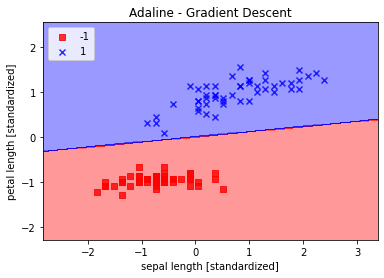

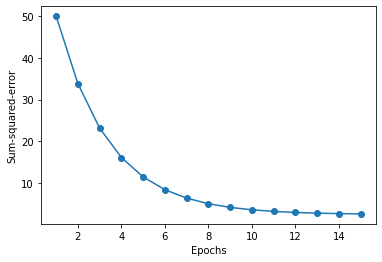

In [11]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

In [13]:
from numpy.random import seed
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.
    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
    shuffle : bool (default: True)
        Shuffles training data every epoch
        if True to prevent cycles.
    random_state : int (default: None)
        Set random state for shuffling
        and initializing the weights.
    """
    
    def __init__(self, eta=0.01, n_iter=10,
        shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state:
            seed(random_state)
            
    def fit(self, X, y):
        """ Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples
            is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.
        Returns
        -------
        self : object
        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost)/len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to zeros"""
        self.w_ = np.zeros(1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.net_input(xi)
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


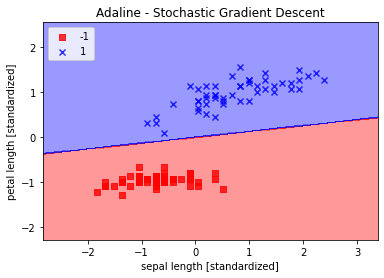

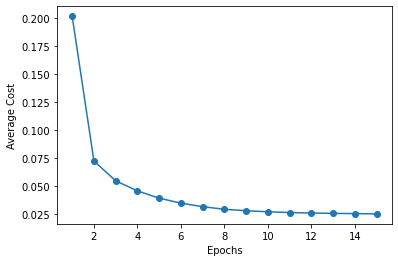

In [14]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()